<a href="https://colab.research.google.com/github/JustAlex5/deep_learning/blob/main/ex6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Ex.6 - **Features visualization**

Submitted by: [... **Alex Kovalyov** ...]



In [1]:
# TensorFlow 
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from matplotlib import pyplot




# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PCA and tSNE:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

print(tf.__version__)

2.7.0


---
In this question we will use a "VGG-like" model (similar to the one you trained in past exercises) that was pre-trained on the CIFAR-10 dataset. you will need to download the model and put it in your working directory.

This model consists of the following layers: 

 - input (32x32x3) -> (Conv -> Conv -> Pool) -> (Conv -> Conv -> Pool) -> (Conv -> Conv -> Pool) -> 2048-Dense -> 10-output
 
There are also some batch-normalization and dropout layers in between. All `Conv2D` layers use 3x3 kernels with `padding='same'`.

We will use the 10,000 validation images of the CIFAR-10 dataset for the following analysis.

In [2]:
# download the pre-trained model:
!git clone https://github.com/rubinj/cifar_model.git

# load the model:
model = tf.keras.models.load_model('cifar_model/model.h5') 

for i,l in enumerate(model.layers):
    print('%-5i' % i,
          '%-20s' % (l.name,),
          '%s' % (l.output_shape[1:],))

Cloning into 'cifar_model'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
0     conv2d               (32, 32, 32)
1     batch_normalization  (32, 32, 32)
2     conv2d_1             (32, 32, 32)
3     batch_normalization_1 (32, 32, 32)
4     max_pooling2d        (16, 16, 32)
5     dropout              (16, 16, 32)
6     conv2d_2             (16, 16, 64)
7     batch_normalization_2 (16, 16, 64)
8     conv2d_3             (16, 16, 64)
9     batch_normalization_3 (16, 16, 64)
10    max_pooling2d_1      (8, 8, 64)
11    dropout_1            (8, 8, 64)
12    conv2d_4             (8, 8, 128)
13    batch_normalization_4 (8, 8, 128)
14    conv2d_5             (8, 8, 128)
15    batch_normalization_5 (8, 8, 128)
16    max_pooling2d_2      (4, 4, 128)
17    dropout_2            (4, 4, 128)
18    flatten              (

In [3]:
# download the cifar10 dataset:

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

170508288/170498071 [==============================] - 3s 0us/step
x_test.shape =  (10000, 32, 32, 3)
y_test.shape =  (10000, 1)


---
### 1. Embedding of the feature space in 2-D (using PCA)

In this question we will use our pre-trained model as a smart feature-extractor.
To this aim, we will use the output from the layer before the last one. This layer produces a 2048-D vector for any given image input of size (32,32,3).

- We will use this method, to extract a 2048-D features representation, for each of the 10,000 test images. 

- Use **PCA** to to reduce the dimensionality of the features **from 2048-D to 2-D**, and use a scatter plot to visualize all samples in this 2-D space. Color the samples by their true label (use the `tab10` color map).



In [4]:
print(model.layers[:-2])

[<keras.layers.convolutional.Conv2D object at 0x7fb08ffd8950>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb08051a490>, <keras.layers.convolutional.Conv2D object at 0x7fb08051ae50>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb0804c4510>, <keras.layers.pooling.MaxPooling2D object at 0x7fb0804610d0>, <keras.layers.core.dropout.Dropout object at 0x7fb08045c0d0>, <keras.layers.convolutional.Conv2D object at 0x7fb080461a90>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb080467dd0>, <keras.layers.convolutional.Conv2D object at 0x7fb080456ed0>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fb080485d10>, <keras.layers.pooling.MaxPooling2D object at 0x7fb08047ff90>, <keras.layers.core.dropout.Dropout object at 0x7fb080491f50>, <keras.layers.convolutional.Conv2D object at 0x7fb080485190>, <keras.layers.normalization.batch_normalization.BatchNormalizatio

In [5]:
activations = Model(inputs=model.inputs, outputs=model.layers[18].output)

prediction = activations.predict(x_test)

In [6]:
pca = PCA(n_components=2).fit(prediction)
X_pca = pca.transform(prediction)

# plt.scatter(X_pca, np.zeros_like(X_pca), s=50, c=y_test, alpha=0.5)

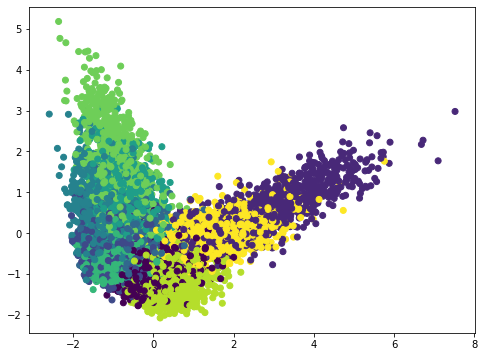

In [7]:
plt.figure(figsize=(8,6))
Xt = X_pca
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_test)

plt.show()

In [8]:
X_pca.shape

(10000, 2)

In [9]:
y_test.shape

(10000, 1)

---
### 2. Embedding of the feature space in 2-D (using PCA + tSNE)

Usually, tSNE gives better results for this kind of task. The problem is that running tSNE on a large matrix (10,000 x 2,048), can take too long.

Therefore, we will first use **PCA** to reduce the dimensionality of the features: **from 2048-D to 50-D**.

Then, we will use **tSNE** to further reduce the dimensionality from **50-D to 2-D**.

As before, use a scatter plot to visualize all  samples in this 2-D space. Color the samples by their true label (use the `tab10` color map).




In [10]:
_model=tf.keras.models.clone_model(
    model, input_tensors=None, clone_function=None
)

In [11]:
    ################################
    ###  your code goes here...  ###
    ################################
activations = Model(inputs=model.inputs, outputs=model.layers[18].output)
prediction = activations.predict(x_test)

pca = PCA(n_components=50).fit(prediction)
X_pca = pca.transform(prediction)

tsne=TSNE(n_components=2)

In [12]:
X_embedded = tsne.fit_transform(X_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [13]:
y_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


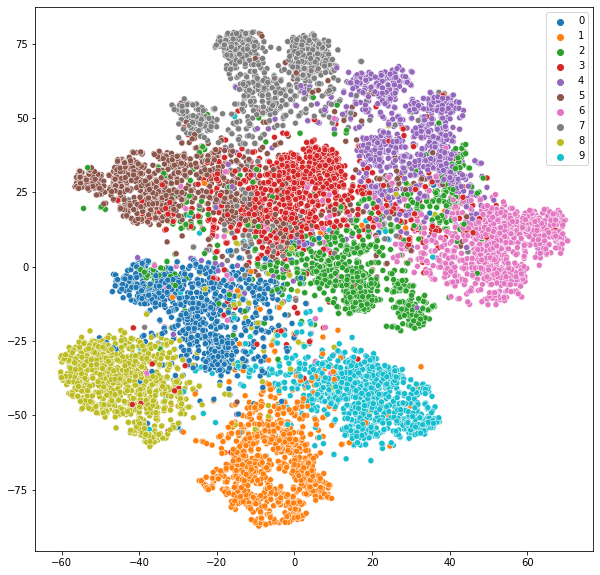

In [14]:
plt.figure(figsize = (10, 10))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_test.reshape(-1),palette=sns.color_palette("tab10"), legend='full')
plt.show()

---
### 3. Maximally activating patches - `conv2d_1` layer

In this question, we will explore the different filters along the pre-trained model.


- pick the **2nd conv** layer in the model (`conv2d_1`), and calculate its activation pattern for each and every of the 10,000 images. The result should be a tensor of size: (10000,32,32,32). 
- pick the **1st filter (channel) in that layer** (out of the 32 available), and look for the neuron with highest activations there (over all 32x32 neurons and 10,000 images). 
- Print the location `(i,j)` of this neuron and the index number (1-10,000) of the choosen image.
- Plot the corresponding patch in that image.

hint: `np.argmax` and `np.unravel_index` might come handy.


In [64]:
    ################################
    ###  your code goes here...  ###
    ################################

activations = Model(inputs=model.inputs, outputs=model.layers[2].output)
prediction = activations.predict(x_test)



([], <a list of 0 Text major ticklabel objects>)

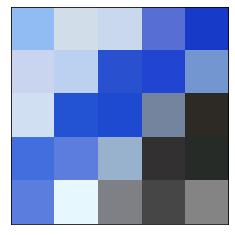

In [65]:
img,x,y=np.unravel_index(np.argmax(prediction[:,:,:,0]),prediction[:,:,:,0].shape)
img=x_test[img,:,:]
pyplot.imshow(img[(x-2):(x+3),(y-2):(y+3),:])
pyplot.show
plt.xticks([])
plt.yticks([])

- now, instead of finding the single highest activation, find the **8 highest activations** (in a descending order), for the same filter as before. In other words, out of the total (10000,32,32,1) activations find the highest 8.
- find the corresponding image patch for each of these 8 activations, and plot them in a single row of subplots.

In [55]:
def getFilters(prediction,s,i,j): #pred 1 2 5
  patches = []
  for f_indx in range(10): 
      ids = np.argsort(prediction[:,:,:,f_indx],axis=None)[-8:] 
      for id in ids:
          img_id, x, y = np.unravel_index(id, prediction.shape[:3])
          img = x_test[img_id]
          img_padded = np.pad(img,((s,s),(s,s),(0,0))) 
          patch = img_padded[i*x:i*x+j, i*y:i*y+j, :]
          patches.append(patch)

  plt.figure(figsize=(12,16))
  for k in range(10*8):
      plt.subplot(10,8,k+1)
      plt.imshow(patches[k])
      plt.xticks([])
      plt.yticks([])


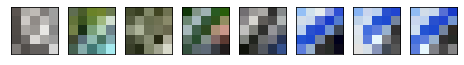

In [40]:
S = 1 
P = 2 
K = 5 

activations = Model(inputs=model.inputs, outputs=model.layers[2].output)
prediction = activations.predict(x_test)
patches = []

idxes = np.argsort(prediction[:,:,:,0],axis=None)[-8:] 
for idx in idxes:
    img, x, y = np.unravel_index(idx, a.shape[:3])
    img = x_test[img]
    img_padded = np.pad(img,((P,P),(P,P),(0,0)))
    patch = img_padded[S*x:S*x+K, S*y:S*y+K, :]
    patches.append(patch)

plt.figure(figsize=(8,8))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(patches[i])
    plt.xticks([])
    plt.yticks([])

- finally, repeat the same process for **9 more filters** (channels) in the same layer (`conv2d_1`): for each of these filters, find the 8 highest activations and extract their corresponding image patches.

- plot all the patches you extracted (total 10x8 patches: 10 filters x 8 patches for each one). Use `10x8` subplots.

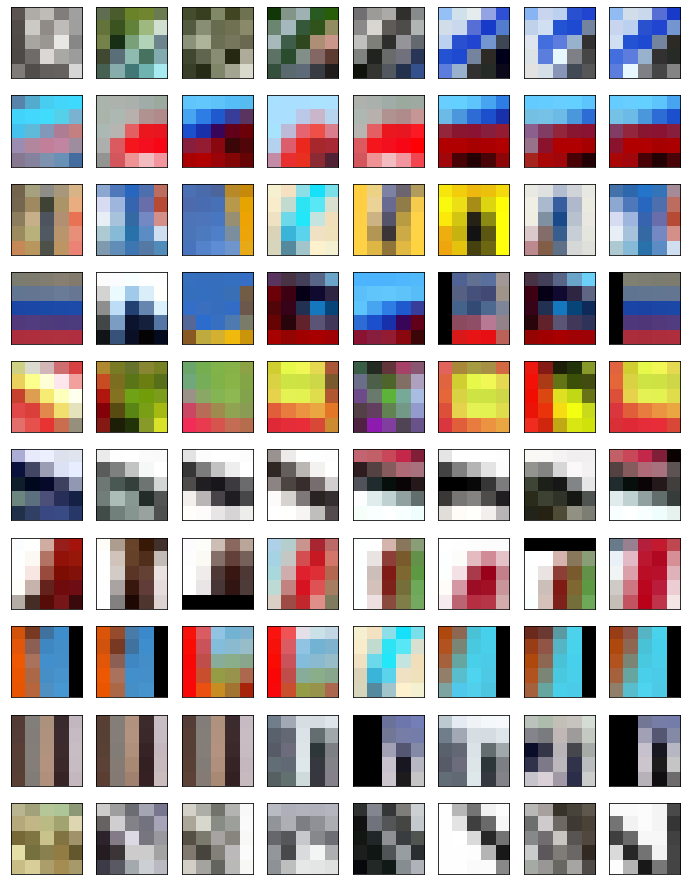

In [57]:
activations = Model(inputs=model.inputs, outputs=model.layers[2].output)
prediction = activations.predict(x_test)
getFilters(prediction,2,1,5)

---
### 4. Maximally activating patches - `conv2d_2` layer

Repeat the same process for a different layer now: `conv2d_2`.

- Extract all activations of that filter: (10000,16,16,64)

- Pick 10 filters (out of its 64), and find the 8 highest activations for each filter.

- plot all the patches you extracted (total 10x8 patches: 10 filters x 8 patches for each one). Use 10x8 subplots.



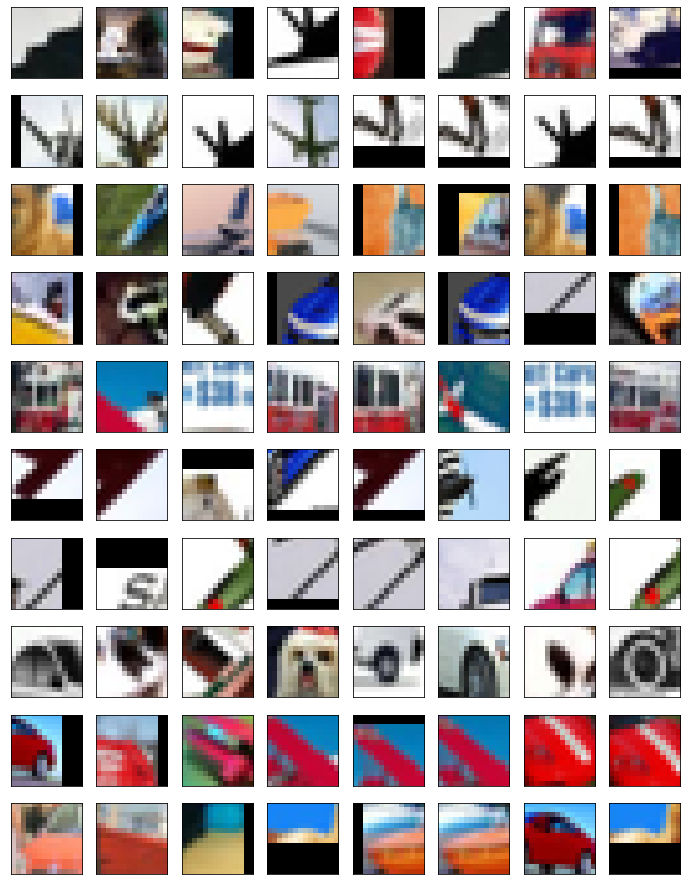

In [59]:
activations = Model(inputs=model.inputs, outputs=model.layers[6].output)
prediction = activations.predict(x_test)
getFilters(prediction,6,2,14)

---
### 5. Maximally activating patches - `conv2d_3` layer

Repeat the same process for a different layer now: `conv2d_3`.

- Extract all activations of that filter: (10000,16,16,64)

- Pick 10 filters (out of its 64), and find the 8 highest activations for each filter.

- plot all the patches you extracted (total 10x8 patches: 10 filters x 8 patches for each one). Use 10x8 subplots.


Pay careful attention to the way you transform the index `(i,j)` in the activation layer to the correct patch in the image.. 

You should get results similar to the ones in the presentation slides.

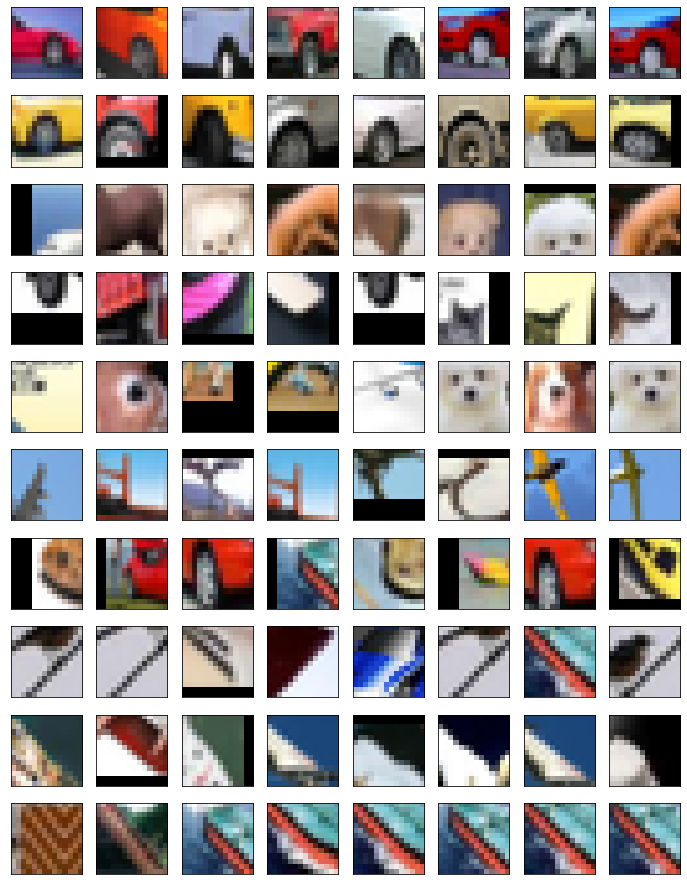

In [61]:
activations = Model(inputs=model.inputs, outputs=model.layers[8].output)
prediction = activations.predict(x_test)
getFilters(prediction,6,2,14)

***
## Good Luck!